# Analisis de campo 'gimnasio'

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Configuraciones

### Configuraciones librerias graficas

In [25]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Configuraciones plot

In [26]:
TAM_TITULO = 35
TAM_ETIQUETA = 30
COLORES_BARRAS = 'colorblind'

## Funciones auxiliares

### Funciones estadisticas

In [74]:
def cuantil_1(serie):
    """
    PRE: Recibe una serie (pandas.Series) .
    POST: Devuelve el cuantil 3 (75%) de la 
    serie recibida .
    """
    return serie.quantile(0.25)

def cuantil_3(serie):
    """
    PRE: Recibe una serie (pandas.Series) .
    POST: Devuelve el cuantil 3 (75%) de la 
    serie recibida .
    """
    return serie.quantile(0.75)

def value_counts_normalize_porcentual(serie):
    """
    PRE: Recibe una serie (pandas.Series).
    POST: Devuelve el porcentaje que 
    representa cada valor en el conjunto 
    total de la serie.
    """
    return serie.value_counts(normalize = True) * 100

### Agregar series de valores a boxplot

In [5]:
def agregar_serie_boxplot(boxplot, serie, color = 'b',desplazamiento_x = 0, desplazamiento_y = 0):
    """
    PRE: Recibe: 
        un boxplot (seaborn.boxplot);
        una serie (pandas.Series) ordenada por 
        fila segun se hayan creado las barras 
        del boxplot para el dataframe de donde 
        proviene la misma;
        un color (string);
        Opcionalmente:
            un desplazamiento en x, y (float)
    POST: Coloca los valores de la serie recibida, 
    en el boxplot, haciendolos coincidir con el 
    xtick que le corresponde a cada valor.
    Los desplazamientos en x e y sirven para 
    terminar de ajustar su posicion.
    Devuelve el boxplot ya configurado.
    """
    posiciones = range(serie.count())
    for pos, xtick in zip(posiciones, boxplot.get_xticks()):
        boxplot.text(
            xtick + desplazamiento_x, 
            serie.get_values()[pos] + desplazamiento_y, 
            serie.get_values()[pos],
            horizontalalignment = 'center', 
            color = color
        )
    return boxplot

## Carga optimizada del set de datos 

In [2]:
zona_prop = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \
                'tipodepropiedad' : 'category', \
                'provincia' : 'category', \
                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \
                'metroscubiertos' : np.float16, \
                'metrostotales' : np.float16, \
                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )

## Gimnasio

## ¿Que valores toma gimnasio?

In [6]:
zona_prop['gimnasio'].unique()

array([False,  True])

## ¿Cuantos datos del set tienen gimansio limpio?

In [9]:
zona_prop['gimnasio'].isnull().sum()

0

No necesitamos descartar ningun dato, en ppio.

In [13]:
zona_gimnasio = zona_prop.copy() # Para poder realizar modifcaciones sin que pandas se queje

## Gimnasio - Fecha

### ¿Cuantos datos perdemos al descartar fechas NaN?

In [14]:
zona_gimnasio['fecha'].isnull().sum()

0

No perdemos ningun dato.

### ¿Como evoluciono la presencia de gimnasio con el pasar de los años?

In [17]:
zona_gimnasio['anio'] = zona_gimnasio['fecha'].dt.year
zona_gimnasio

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,nan,nan,2015-08-23,False,False,False,False,False,"2,273,000.00",2015
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,19.31,-99.23,2013-06-28,False,False,False,True,True,"3,600,000.00",2013
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,nan,nan,2015-10-17,False,False,False,False,False,"1,200,000.00",2015
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,19.30,-99.69,2012-03-09,False,False,False,True,True,"650,000.00",2012
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,nan,nan,2016-06-07,False,False,False,False,False,"1,150,000.00",2016
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,...,19.30,-99.15,2014-03-18,False,False,False,False,True,"1,100,000.00",2014
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,nan,3.00,1.00,...,17.14,-96.80,2016-02-23,False,False,False,False,False,"1,150,000.00",2016
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.00,4.00,2.00,...,20.67,-87.04,2016-10-20,False,False,False,False,False,"4,200,000.00",2016
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,...,nan,nan,2014-01-06,False,False,False,True,True,"310,000.00",2014
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,nan,nan,nan,...,19.32,-98.89,2016-12-22,False,False,False,False,False,"6,200,000.00",2016


In [54]:
anio_agrupado_gimnasio_cant = zona_gimnasio.groupby(['anio']).agg({'gimnasio' : 'value_counts'})
anio_agrupado_gimnasio_cant.columns = ['cantidad_propiedades']
anio_agrupado_gimnasio_cant

cantidad_propiedades
anio gimnasio                      
2012 False                    22537
     True                       997
2013 False                    29059
     True                      1327
2014 False                    38635
     True                      1937
2015 False                    49024
     True                      2446
2016 False                    85751
     True                      8287

In [55]:
anio_agrupado_gimnasio_cant.reset_index(inplace = True)
anio_agrupado_gimnasio_cant.columns = ['anio', 'tiene_gimnasio', 'cantidad_propiedades']
anio_agrupado_gimnasio_cant

,anio,tiene_gimnasio,cantidad_propiedades
0,2012,False,22537
1,2012,True,997
2,2013,False,29059
3,2013,True,1327
4,2014,False,38635
5,2014,True,1937
6,2015,False,49024
7,2015,True,2446
8,2016,False,85751
9,2016,True,8287


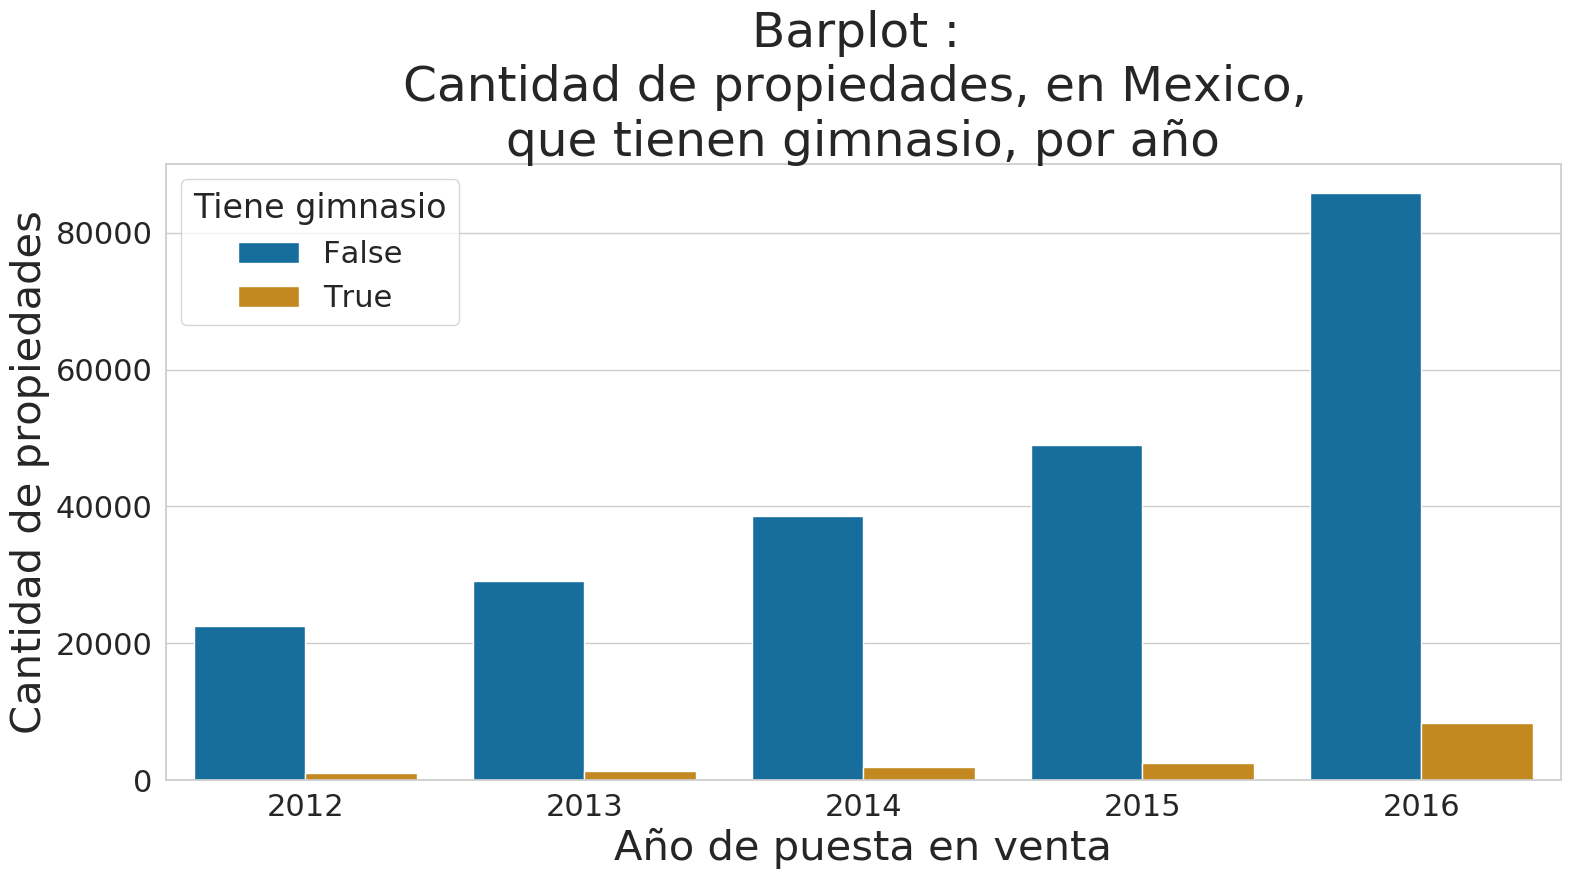

In [61]:
plot_barplot_gimnasio_anio_cant = sns.barplot(
                                x = 'anio',
                                y = 'cantidad_propiedades',
                                hue = 'tiene_gimnasio',
                                data = anio_agrupado_gimnasio_cant,
                                palette = COLORES_BARRAS
                            )
plot_barplot_gimnasio_anio_cant.set_title(
    'Barplot : \nCantidad de propiedades, en Mexico, \nque tienen gimnasio, por año',
    fontsize = TAM_TITULO
)
plot_barplot_gimnasio_anio_cant.set_xlabel('Año de puesta en venta', fontsize = TAM_ETIQUETA)
plot_barplot_gimnasio_anio_cant.set_ylabel('Cantidad de propiedades', fontsize = TAM_ETIQUETA)
plot_barplot_gimnasio_anio_cant.legend(title = 'Tiene gimnasio')
plt.show()

Vemos que la cantidad de propiedades en venta aumenta con el pasar de los años.  
La cantidad de propiedades con gimnasio incluido, siempre es muy baja.  
No podemos afirmar nada sobre el crecimiento en porcentaje de las propiedades con gimnasio, pues requiere otro tipo de grafico.

In [85]:
anio_agrupado_gimnasio_porcentaje = zona_gimnasio.groupby(['anio'])['gimnasio'].apply(value_counts_normalize_porcentual)
anio_agrupado_gimnasio_porcentaje = anio_agrupado_gimnasio_porcentaje.to_frame()
anio_agrupado_gimnasio_porcentaje.columns = ['porcentaje_propiedades']
anio_agrupado_gimnasio_porcentaje.reset_index(inplace = True)
anio_agrupado_gimnasio_porcentaje.columns = ['anio', 'tiene_gimnasio', 'porcentaje_propiedades']
anio_agrupado_gimnasio_porcentaje

,anio,tiene_gimnasio,porcentaje_propiedades
0,2012,False,95.76
1,2012,True,4.24
2,2013,False,95.63
3,2013,True,4.37
4,2014,False,95.23
5,2014,True,4.77
6,2015,False,95.25
7,2015,True,4.75
8,2016,False,91.19
9,2016,True,8.81


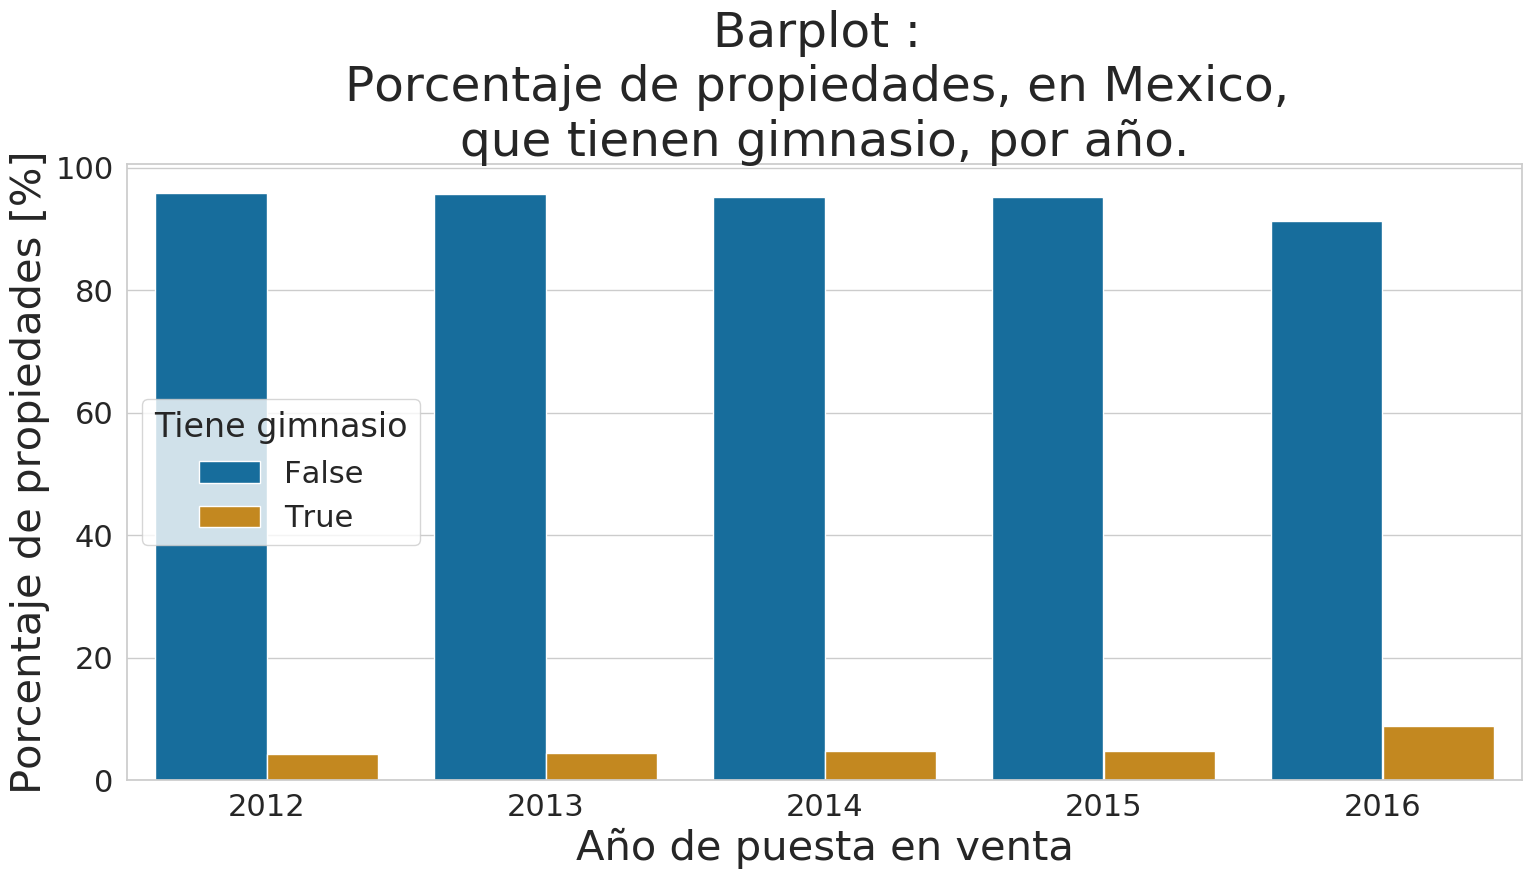

In [87]:
plot_barplot_gimnasio_anio_porc = sns.barplot(
                                    x = 'anio',
                                    y = 'porcentaje_propiedades',
                                    hue = 'tiene_gimnasio',
                                    data = anio_agrupado_gimnasio_porcentaje,
                                    palette = COLORES_BARRAS
                                )
plot_barplot_gimnasio_anio_porc.set_title(
    'Barplot : \nPorcentaje de propiedades, en Mexico, \nque tienen gimnasio, por año.',
    fontsize = TAM_TITULO
)
plot_barplot_gimnasio_anio_porc.set_xlabel('Año de puesta en venta', fontsize = TAM_ETIQUETA)
plot_barplot_gimnasio_anio_porc.set_ylabel('Porcentaje de propiedades [%]', fontsize = TAM_ETIQUETA)
plot_barplot_gimnasio_anio_porc.legend(title = 'Tiene gimnasio',loc = 'center left')
plt.show()

Vemos que el porcentaje de propiedades con gimnasio es bastante bajo.  
Este porcentaje parece mantenerse constante entre 2012 y 2015, y tiene un leve aumento en el 2016.

## Gimnasio - Usosmultiples

### ¿Cuantos datos perdemos por descartar usosmultiples NaN?

In [88]:
zona_gimnasio['usosmultiples'].isnull().sum()

0

No perdemos ningun dato.

### ¿Que es usosmultiples?

In [123]:
zona_gimnasio['usosmultiples'].unique()

array([False,  True])

### ¿Como se relaciona la presencia de gimnasio con la presencia de usosmutiples?

In [101]:
gimnasio_usosmultiples_agrupados_cant = zona_gimnasio.groupby(['gimnasio', 'usosmultiples']).agg({'gimnasio' : 'count'})
gimnasio_usosmultiples_agrupados_cant.columns = ['cantidad_propiedades']
gimnasio_usosmultiples_agrupados_cant.reset_index(inplace = True)
gimnasio_usosmultiples_agrupados_cant.columns = ['tiene_gimnasio', 'tiene_usosmultiples', 'cantidad_propiedades']
gimnasio_usosmultiples_pivot_cant = gimnasio_usosmultiples_agrupados_cant.pivot_table(index = 'tiene_gimnasio', columns = 'tiene_usosmultiples', values = 'cantidad_propiedades')
gimnasio_usosmultiples_pivot_cant

tiene_usosmultiples,False,True
tiene_gimnasio,,
False,218121,6885
True,8657,6337


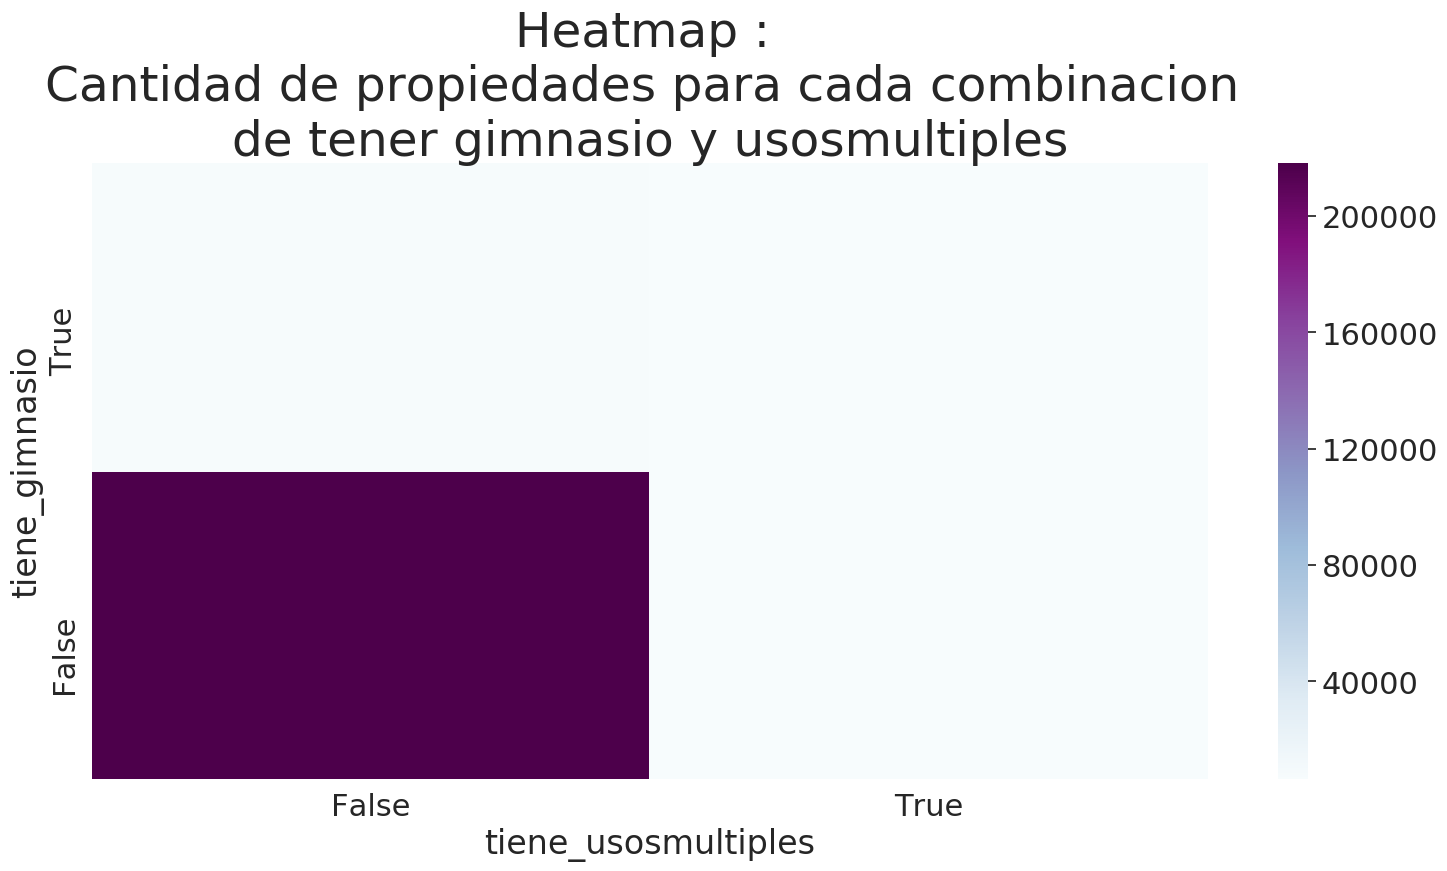

In [109]:
plot_heatmap_gimnasio_usosmultiples_cant = sns.heatmap(gimnasio_usosmultiples_pivot_cant, cmap = 'BuPu')
plot_heatmap_gimnasio_usosmultiples_cant.invert_yaxis()
plot_heatmap_gimnasio_usosmultiples_cant.set_title(
    'Heatmap : \nCantidad de propiedades para cada combinacion \nde tener gimnasio y usosmultiples',
    fontsize = TAM_TITULO
)
plt.show()

El mapa de calor no muestra una alta concentracion de propiedades que no tienen ni gimnasio ni usos multiples

In [110]:
gimnasio_usosmultiples_agrupados_cant

,tiene_gimnasio,tiene_usosmultiples,cantidad_propiedades
0,False,False,218121
1,False,True,6885
2,True,False,8657
3,True,True,6337


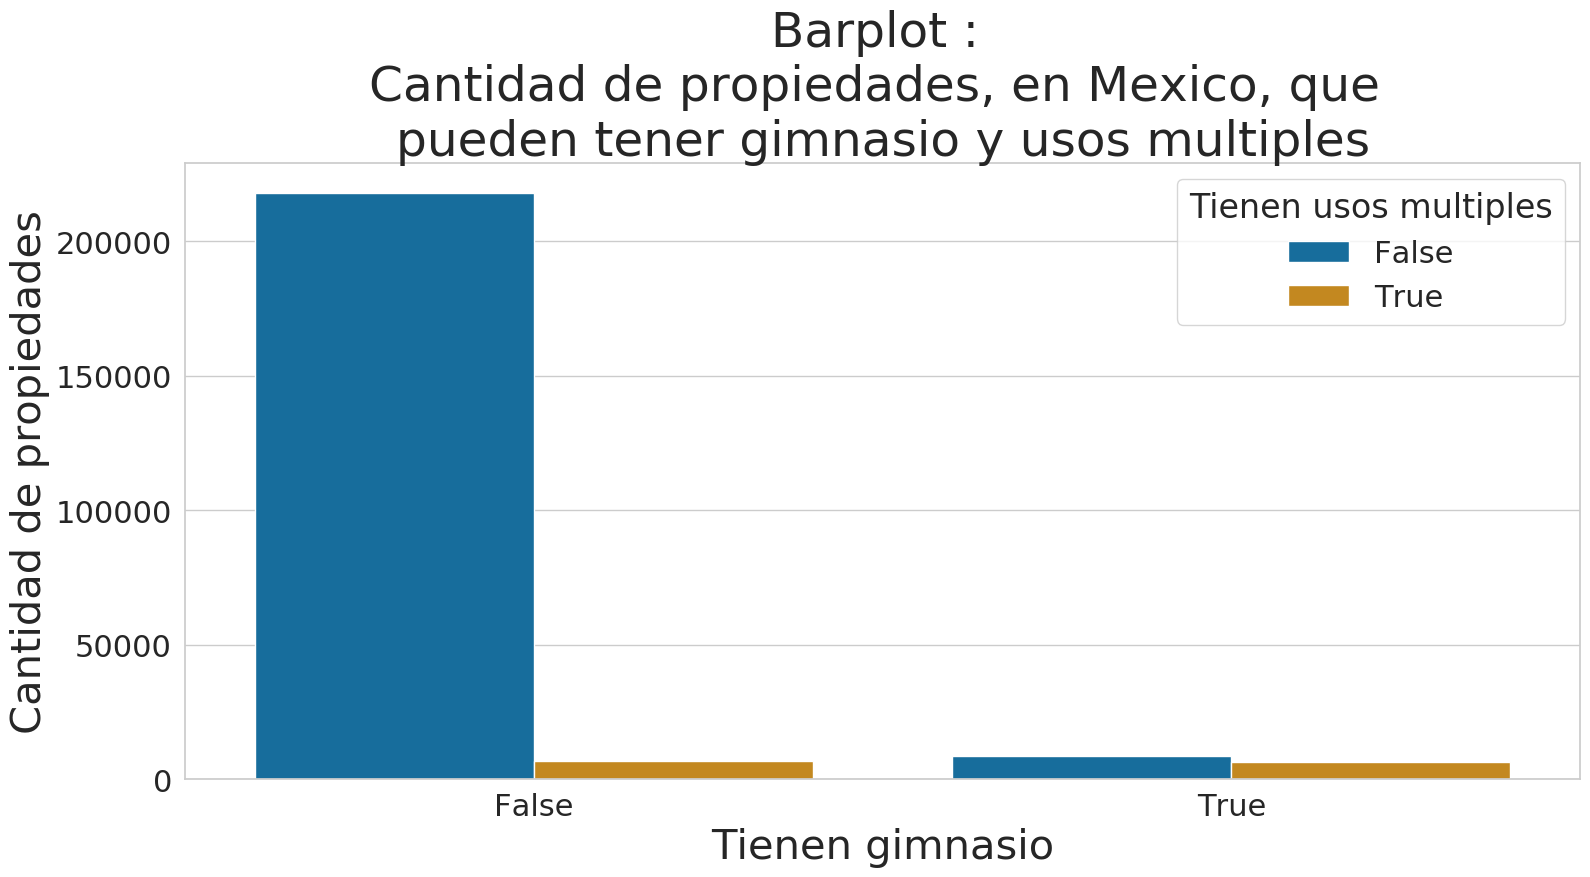

In [143]:
plot_barplot_gimnasio_usosmultiples_cant = sns.barplot(
                                            x = 'tiene_gimnasio',
                                            y = 'cantidad_propiedades',
                                            hue = 'tiene_usosmultiples',
                                            data = gimnasio_usosmultiples_agrupados_cant,
                                            palette = COLORES_BARRAS
                                        )
plot_barplot_gimnasio_usosmultiples_cant.set_title(
    'Barplot : \nCantidad de propiedades, en Mexico, que \npueden tener gimnasio y usos multiples',
    fontsize = TAM_TITULO
)
plot_barplot_gimnasio_usosmultiples_cant.set_xlabel('Tienen gimnasio', fontsize = TAM_ETIQUETA)
plot_barplot_gimnasio_usosmultiples_cant.set_ylabel('Cantidad de propiedades', fontsize = TAM_ETIQUETA)
plot_barplot_gimnasio_usosmultiples_cant.legend(title = 'Tienen usos multiples')
plt.show()

Vemos que la mayoria de las propiedades no tienen ni gimnasio ni usos multiples

## Gimnasio - Piscina

### ¿Cuantos datos perdemos si descartamos piscina NaN?

In [120]:
zona_gimnasio['piscina'].isnull().sum()

0

No perdemos ningun dato.

### ¿Que es piscina?

In [122]:
zona_gimnasio['piscina'].unique()

array([False,  True])

### ¿Cuantas propiedades en Mexico tienen gimnasio y piscina?

In [121]:
gimnasio_piscina_agrupados_cant = zona_gimnasio.groupby(['gimnasio', 'piscina']).agg({'gimnasio' : 'count'})
gimnasio_piscina_agrupados_cant.columns = ['cantidad_propiedades']
gimnasio_piscina_agrupados_cant.reset_index(inplace = True)
gimnasio_piscina_agrupados_cant.columns = ['tiene_gimnasio', 'tiene_piscina', 'cantidad_propiedades']
gimnasio_piscina_agrupados_cant

,tiene_gimnasio,tiene_piscina,cantidad_propiedades
0,False,False,211400
1,False,True,13606
2,True,False,7628
3,True,True,7366


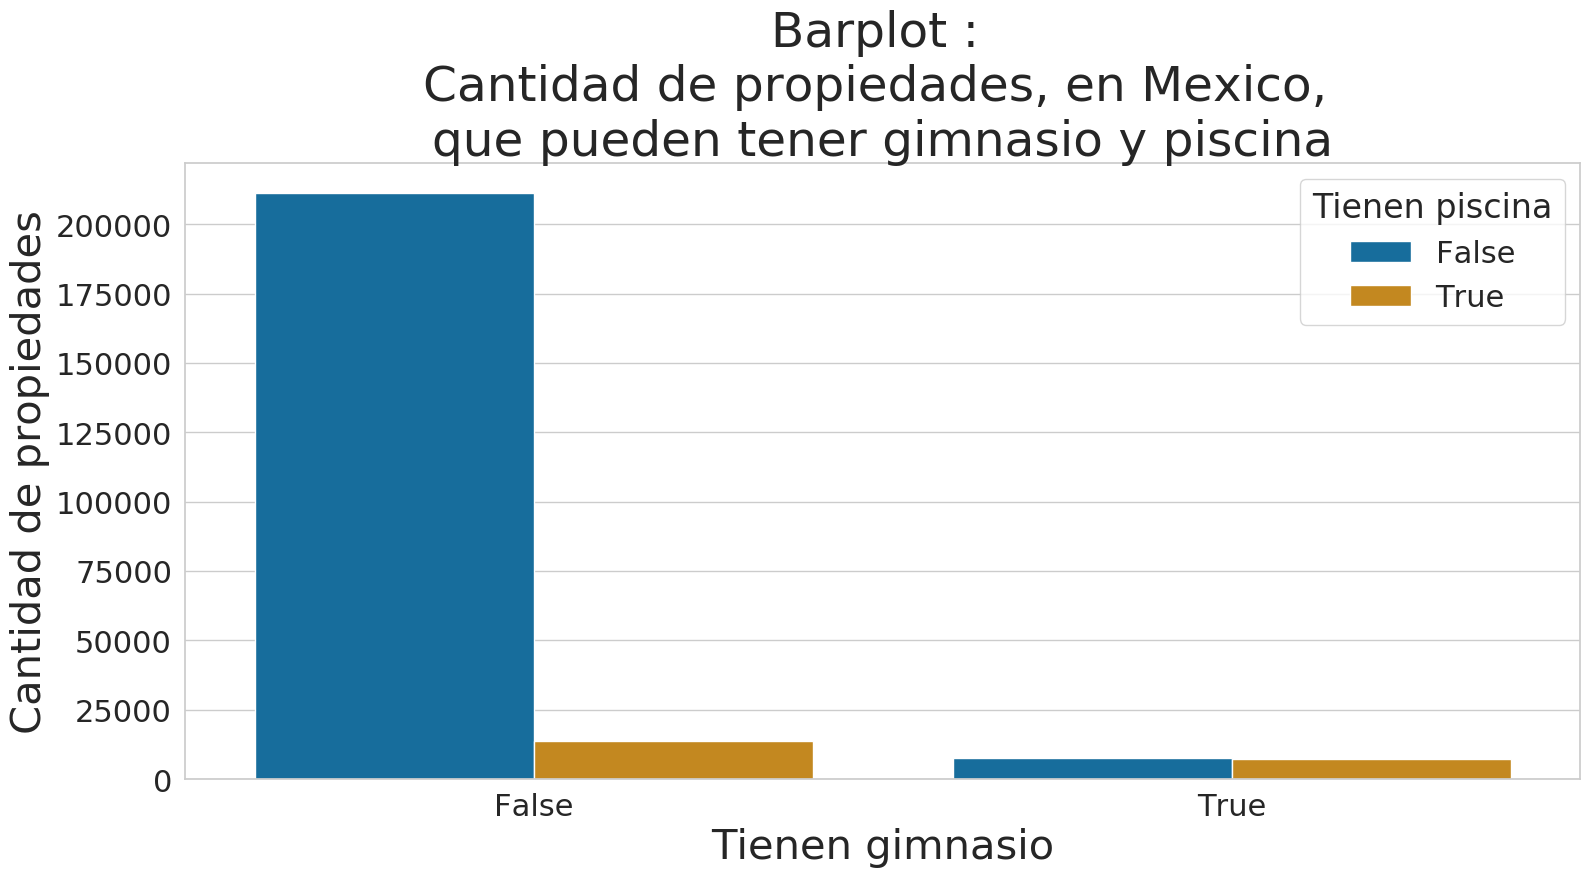

In [141]:
plot_barplot_gimnasio_piscina_cant = sns.barplot(
                                        x = 'tiene_gimnasio',
                                        y = 'cantidad_propiedades',
                                        hue = 'tiene_piscina',
                                        data = gimnasio_piscina_agrupados_cant,
                                        palette = COLORES_BARRAS
                                    )
plot_barplot_gimnasio_piscina_cant.set_title(
    'Barplot : \nCantidad de propiedades, en Mexico, \nque pueden tener gimnasio y piscina',
    fontsize = TAM_TITULO
)
plot_barplot_gimnasio_piscina_cant.set_xlabel('Tienen gimnasio', fontsize = TAM_ETIQUETA)
plot_barplot_gimnasio_piscina_cant.set_ylabel('Cantidad de propiedades', fontsize = TAM_ETIQUETA)
plot_barplot_gimnasio_piscina_cant.legend(title = 'Tienen piscina')
plt.show()

A ojo !, vemos que NO tiene gimnasio es mas probable que no tenga piscina; en caso contrario, ya no podriamos afirmar lo mismo con tanta precision

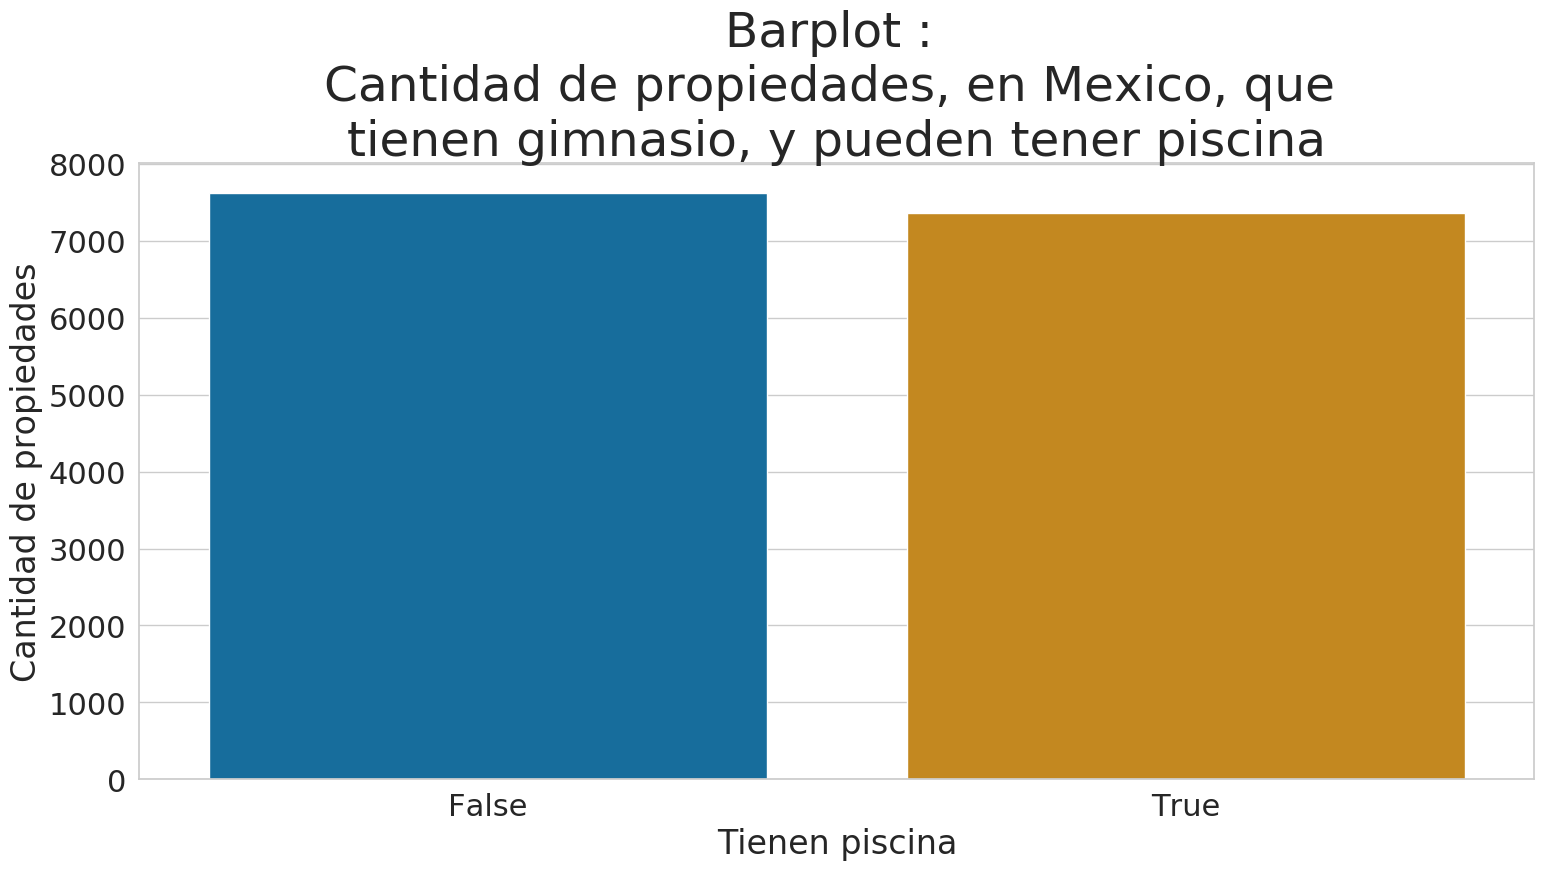

In [140]:
plot_barplot_gimnasio_true_piscina_cant = sns.barplot(
                                            x = 'tiene_piscina',
                                            y = 'cantidad_propiedades',
                                            data = gimnasio_piscina_agrupados_cant.loc[gimnasio_piscina_agrupados_cant['tiene_gimnasio'] == True],
                                            palette = COLORES_BARRAS,
)
plot_barplot_gimnasio_true_piscina_cant.set_title(
    'Barplot : \nCantidad de propiedades, en Mexico, que \ntienen gimnasio, y pueden tener piscina',
    fontsize = TAM_TITULO
)
plot_barplot_gimnasio_true_piscina_cant.set_xlabel('Tienen piscina')
plot_barplot_gimnasio_true_piscina_cant.set_ylabel('Cantidad de propiedades')
plt.show()

Con este acercamiento a los propiedades que tienen gimnasio, estamos seguros de que no podemos estar seguros, si tambien tienen piscina o no.